In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import ipywidgets
from ipywidgets import interact, interactive, Dropdown, widgets
from IPython.display import clear_output, display, HTML

In [3]:
import os
import pickle
import pprint
from glob import glob
os.chdir('/home/users/alexno/sleep-staging')

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from h5py import File

from utils.plotting import plot_psg_hypnogram_hypnodensity
from utils.plotting import plot_hypnodensity

In [4]:
available_predictions = glob("experiments/**/SSC-WSC_test_predictions.pkl", recursive=True)
pprint.pprint(available_predictions)

,Index,ID,ID-ling,Cohort,Diagnosis,Label,Sleep scoring training data,Sleep scoring test data,Narcolepsy training data,Narcolepsy test data,Replication data,High pre-test,CSF hypocretin-1,DQ0602,Added by Alex
0,NaN,SSC_NARCO_1508_1,1508,SSC,'T1 NARCOLEPSY',1,0,1,1,0,0,1,na,1,1
1,NaN,SSC_NARCO_1534_1,1534,SSC,'T1 NARCOLEPSY',1,0,1,1,0,0,1,na,1,1
2,NaN,SSC_NARCO_1538_1,1538,SSC,'T1 NARCOLEPSY',1,0,1,0,1,0,1,na,1,1
3,NaN,SSC_NARCO_1647_1,1647,SSC,'T1 NARCOLEPSY',1,0,1,1,0,0,1,na,1,1
4,1267.0,SSC_1958_1,1958,SSC,'T1 NARCOLEPSY',1,0,1,1,0,0,1,0,0,0


['experiments/massc/att30/20201124_080609/SSC-WSC_test_predictions.pkl',
 'experiments/massc/avg_kw21/20201126_043826/SSC-WSC_test_predictions.pkl']


In [5]:
selected_experiment = available_predictions[1]
with open(selected_experiment, 'rb') as f:
    predictions = pickle.load(f)
list_studies = list(predictions.keys())
df_preds = pd.read_csv(os.path.join(os.path.dirname(selected_experiment), 'SSC-WSC_test_results.csv'), index_col=0)
df = pd.read_csv('overview_file_cohortsEM-ling1.csv')
df_preds = pd.merge(left=df_preds, right=df[['ID', 'Diagnosis', 'Label']], how='left', right_on='ID', left_on='SubjectID')
# display(df_preds.query('Label == 1').sort_values('Balanced accuracy', ascending=False).head())

,FileID,SubjectID,Window,Case,Accuracy,Balanced accuracy,Kappa,F1,Precision,Recall,...,Precision - N3,Recall - N3,Support - N3,F1 - REM,Precision - REM,Recall - REM,Support - REM,ID,Diagnosis,Label
499,SSC_6542_1.h5,SSC_6542_1,1 s,all,0.821542,0.879353,0.745264,0.708109,0.721268,0.879353,...,0.920863,0.955224,134.0,0.883168,0.854406,0.913934,244.0,SSC_6542_1,'T1 NARCOLEPSY',1
397,SSC_5335_1.h5,SSC_5335_1,1 s,all,0.752821,0.768032,0.678440,0.734077,0.737968,0.768032,...,0.795181,0.985075,134.0,0.759322,0.666667,0.881890,127.0,SSC_5335_1,'T1 NARCOLEPSY',1
355,SSC_5139_1.h5,SSC_5139_1,1 s,all,0.649302,0.714275,0.498503,0.585201,0.617166,0.714275,...,0.447619,0.921569,51.0,0.836449,0.736626,0.967568,185.0,SSC_5139_1,'T1 NARCOLEPSY',1
299,SSC_1958_1.h5,SSC_1958_1,1 s,all,0.656039,0.700787,0.480362,0.477659,0.486116,0.700787,...,0.292453,0.756098,41.0,0.470588,0.307692,1.000000,16.0,SSC_1958_1,'T1 NARCOLEPSY',1
306,SSC_4723_1.h5,SSC_4723_1,1 s,all,0.662694,0.680094,0.549286,0.599497,0.615273,0.680094,...,0.994536,0.719368,253.0,0.896175,0.828283,0.976190,168.0,SSC_4723_1,'T1 NARCOLEPSY',1


### SSC_5139_1 - Narcolepsy type 1

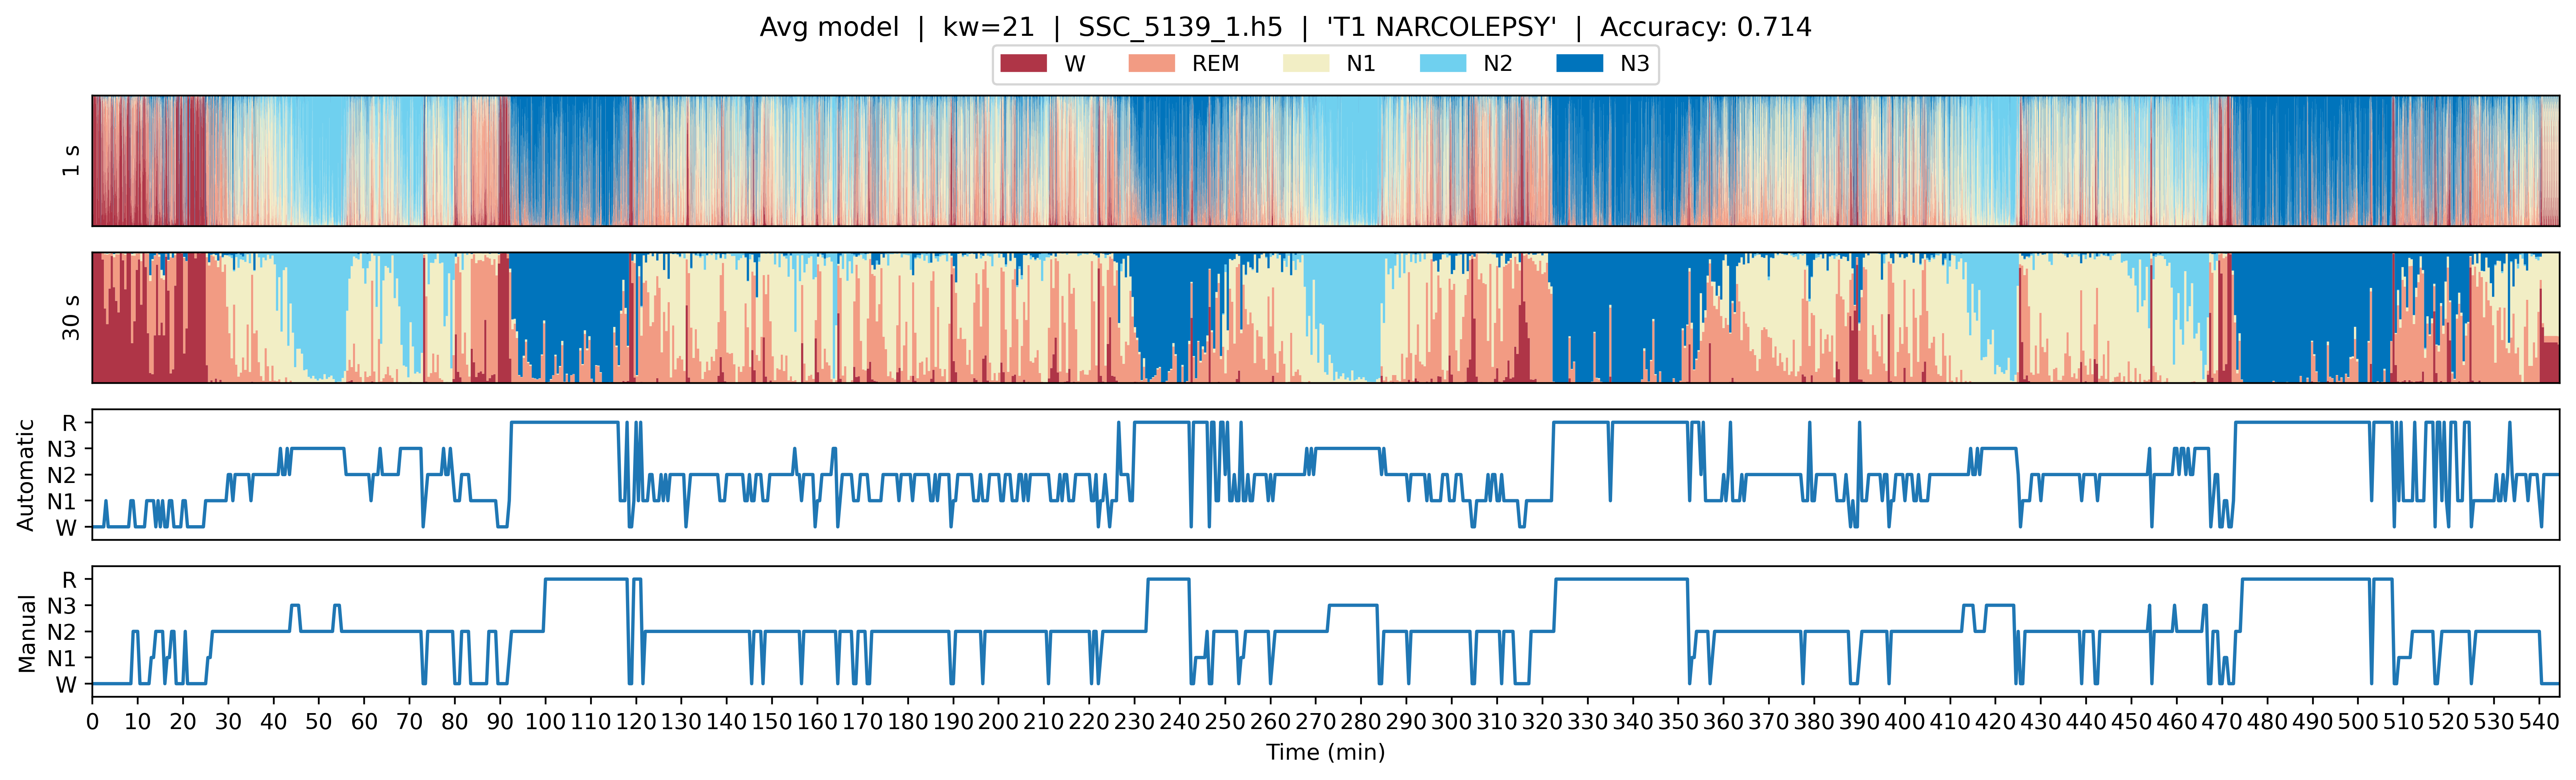

In [6]:
selected_record = 'SSC_5139_1.h5'
record = predictions[selected_record]
plot_hypnodensity(
    record['logits'], 
    record['predicted'], 
    record['true'], 
    title=("Avg model  |  " +
           "kw=21  |  " +
           f"{selected_record}  |  " +
           f"{df_preds.loc[df_preds['FileID'] == selected_record]['Diagnosis'].values[0]}  |  " +
           f"Accuracy: {df_preds.loc[df_preds['FileID'] == selected_record]['Balanced accuracy'].values[0]:.3f}")
)

In [ ]:
plot_psg_hypnogram_hypnodensity(
    selected_record, 
    record_predictions=record, 
    seq_idx=4, 
    interval=10
)

In [ ]:
plot_psg_hypnogram_hypnodensity(
    selected_record, 
    record_predictions=record, 
    seq_idx=8
)

In [ ]:
plot_psg_hypnogram_hypnodensity(
    selected_record, 
    record_predictions=record, 
    seq_idx=20,
    interval=10
)

In [ ]:
plot_psg_hypnogram_hypnodensity(
    selected_record, 
    record_predictions=record, 
    seq_idx=45,
    interval=5
)